# Linear Regression

# Table of Contents 

<ol>
<li> Linear regression with a toy  </li>
- matrices and math <br>
- building a model from scratch<br>
- building a model with statsmodel and sklearn
<li> Simple linear regression with automobile data </li>
<li> Multiple linear regression with automobile data </li>
<li> Interpreting results</li>
</ol>

## Part 1: Linear regression with a toy 
We first examine a toy problem, focusing our efforts on fitting a linear model to a small dataset with three observations.  Each observation consists of one predictor $x_i$ and one response $y_i$ for $i = 1, 2, 3$,

\begin{equation*}
(x , y) = \{(x_1, y_1), (x_2, y_2), (x_3, y_3)\}.
\end{equation*}

To be very concrete, let's set the values of the predictors and responses.

\begin{equation*}
(x , y) = \{(1, 2), (2, 2), (3, 4)\}
\end{equation*}

There is no line of the form $\beta_0 + \beta_1 x = y$ that passes through all three observations, since the data is not collinear.  Thus our aim is to find the line that best fits these observations in the *least-squares sense*, as discussed in lecture.


### Matrices and math

Suspending reality, suppose there is a line $\beta_0 + \beta_1 x = y$ that passes through all three observations.  Then we'd solve

\begin{eqnarray}
\beta_0 + \beta_1 &=& 2 \nonumber \\
\beta_0 + 2 \beta_1 &=& 2 \nonumber \\
\beta_0 + 3 \beta_1 &=& 4, \nonumber \\
\end{eqnarray}


for  $\beta_0$ and  $\beta_1$, the intercept and slope of the desired line.  
We have the matrix equation $X \beta = Y$ where

\begin{equation}
X = \begin{bmatrix}
1 & 1\\
1 & 2\\
1 & 3
\end{bmatrix}, \quad
\beta = \begin{pmatrix}
\beta_0 \\
\beta_1 
\end{pmatrix}, \quad \mathrm{and} 
\quad Y = \begin{bmatrix}
2 \\
2 \\
4 
\end{bmatrix}.
\end{equation}

To find the best possible solution to this linear system that has no solution, we need to solve the *normal equations*, or

\begin{equation}
X^T X \beta = X^T Y.
\end{equation}

If $X^T X$ is invertible then the solution is

\begin{equation}
\beta = (X^T X)^{-1} X^T Y.
\end{equation}




> **EXERCISE:** What if the toy problem included a second predictor variable?  How would $X, \beta$, and $Y$ change, if at all?  Would anything else change?  Explain.

### Building a model from scratch
We solve the normal equations to find the best fit solution to our toy problem.   Note that we have constructed our toy problem so that $X^T X$ is invertible. Note that we've imported statsmodels and sklearn in this below, which we'll use to build regression models.

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model, datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

The snippets of code below solves the equations using the observed predictors and responses, which we'll call the training data set. 

In [3]:
#observed predictors
x_train = np.array([1, 2, 3])
# or do this, which creates 3 x 1 vector so no need to reshape
#x_train = np.array([[1], [2], [3]])   
print(x_train.shape)

(3,)


In [4]:
x_train = x_train.reshape(len(x_train),1)
#check dimensions 
print(x_train.shape)
print(x_train)

(3, 1)
[[1]
 [2]
 [3]]


In [5]:
#observed responses
y_train = np.array([2, 2, 4])
# or do this, which creates 3 x 1 vector so no need to reshape
#y_train = np.array([[2], [2], [4]])
y_train = y_train.reshape(len(y_train),1)
print(y_train.shape)

(3, 1)


In [6]:
#build matrix X by concatenating predictors and a column of ones
n = x_train.shape[0]
ones_col = np.ones((n, 1))
X = np.concatenate((ones_col, x_train), axis=1)
#check X and dimensions
print(X, X.shape)

[[1. 1.]
 [1. 2.]
 [1. 3.]] (3, 2)


In [7]:
#matrix X^T X
LHS = np.dot(np.transpose(X), X)

#matrix X^T Y
RHS = np.dot(np.transpose(X), y_train)
LHS
np.transpose(X)

array([[1., 1., 1.],
       [1., 2., 3.]])

In [8]:
#solution beta to normal equations, since LHS is invertible by toy construction
betas = np.dot(np.linalg.inv(LHS), RHS)
betas

array([[0.66666667],
       [1.        ]])

In [9]:
#intercept beta0
beta0 = betas[0]

#slope beta1
beta1 = betas[1]

print(beta0, beta1)

[0.66666667] [1.]


> **EXERCISE:** Turn the code from the above cells into a function, called `simple_linear_regression_fit`, that inputs the training data and returns `beta0` and `beta1`.
> To do this, copy and paste the code from the above cells below and adjust the code as needed, so that the training data becomes the input and the betas become the output.
> Check your function by calling it with the training data from above and printing out the beta values.

In [ ]:
x_train = np.array([1,2,3])
y_train = np.array([2,2,4])
def simple_linear_regression_fit(x_train, y_train):
    x_mat = np.reshape(len(x_train),1)
    n = x_mat.shape[0]
    ones = np.ones((n,1))
    X = np.concatenate((ones,x_mat),axis=1)
    print(X.shape)
    Y = np.reshape(len(y_train),1)
    print(Y.shape)
    l = np.dot(np.transpose(X),X)
    r = np.dot(np.transpose(X),Y)
    b = np.dot(np.linalg.inv(l),r)
    return b

e = simple_linear_regression_fit(x_train, y_train)[0]
f = simple_linear_regression_fit(x_train, y_train)[1]

print("(beta0, beta1) = (%f, %f)" %(e, f))


> **EXERCISE:** Plot the training data.  Do the values of `beta0` and `beta1` seem reasonable?

>Now write a lambda function `f` for the best fit line with `beta0` and `beta1`, and plot the best fit line together with the training data.

Text(0, 0.5, 'y')

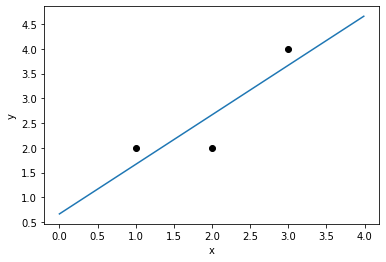

In [11]:
#beta 1 > 0 which is reasonable given the data.  the best fit line should have a positive slope.
f = lambda x : beta0 + beta1*x
xfit = np.arange(0, 4, .01)
yfit = f(xfit)
# print(xfit)
plt.plot(x_train, y_train, 'ko', xfit, yfit)
plt.xlabel('x')
plt.ylabel('y')

### Building a model with statsmodel and sklearn

Now that we can concretely fit the training data from scratch, let's learn two Python packages to do it all for us: [statsmodels](http://www.statsmodels.org/stable/regression.html) and [scikit-learn (sklearn)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).  Our goal  is to show how to implement simple linear regression with these packages.  For an important sanity check, we compare the $\beta$ values from statsmodel and sklearn to the $\beta$ values that we found from above from scratch.

For the purposes of this lab, statsmodels and sklearn do the same thing.  More generally though, statsmodels tends to be easier for inference, whereas sklearn has machine-learning algorithms and is better for prediction.  

**Below is the code for statsmodels.**  Statsmodels does not by default include the column of ones in the $X$ matrix, so we include it with `sm.add_constant`.

In [ ]:
x_train = np.array([1,2,3])
y_train = np.array([2,2,4])
x_train = x_train.reshape(len(x_train),1)
y_train = y_train.reshape(len(y_train),1)
#create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)
#this is the same matrix as in our scratch problem!
print(X)
#build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y_train, X)
#save regression info (parameters, etc) in results_sm
results_sm = toyregr_sm.fit()
#pull the beta parameters out from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print("(beta0, beta1) = (%f, %f)" %(beta0_sm, beta1_sm))

Besides the beta parameters, `results_sm` contains a ton of other potentially useful information.  Type `results_sm.` and hit tab to see.

**Below is the code for sklearn.**

In [15]:
x_train = np.array([1,2,3])
y_train = np.array([2,2,4])
x_train = x_train.reshape(len(x_train),1)
y_train = y_train.reshape(len(y_train),1)
#build the least squares model
toyregr_skl = linear_model.LinearRegression()
#save regression info (parameters, etc) in results_skl
results_skl = toyregr_skl.fit(x_train,y_train)
#pull the beta parameters out from results_skl
beta0_skl = results_skl.intercept_
beta1_skl = results_skl.coef_[0]

print("(beta0, beta1) = (%f, %f)" %(beta0_skl, beta1_skl))

(beta0, beta1) = (0.666667, 1.000000)


## Part 2: Simple linear regression with automobile data
We will now use sklearn to to predict automobile milesage per gallon (mpg) and evaluate these predictions. We first load the data and split them into a training set and a testing set.

In [16]:
#load mtcars
cars_data = pd.read_csv("data/mtcars.csv")
cars_data = cars_data.rename(columns={"Unnamed: 0":"name"})
cars_data.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [17]:
#split into training set and testing set
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#set random_state to get the same split every time
train_data, test_data = train_test_split(cars_data, test_size = 0.3, random_state = 6)
train_data

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1


> **EXERCISE:** Go to the documentation of sklearn train_test_split. Read and explain what the parameters do. 

In [ ]:
#testing set is ~30% of the total data; training set is ~70%
cars_data.shape, train_data.shape, test_data.shape

We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

>**EXERCISE:**  Pick one variable to use as a predictor for simple linear regression.  Create a markdown cell below and discuss your reasons.  You may want to justify this with some visualizations.  Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors?

> **EXERCISE:** With either sklearn or statsmodels, fit the training data using simple linear regression.  Use the model to make mpg predictions on testing set.  

> Plot the data and the prediction.  

>Print out the mean squared error for the training set and the testing set and compare.

In [18]:
#define  predictor and response for training set
y_train = train_data.mpg
x_train = train_data[['wt']]

# define predictor and response for testing set
y_test = test_data.mpg
x_test = test_data[['wt']]

In [19]:
# create linear regression object with sklearn
regr = linear_model.LinearRegression()

# train the model and make predictions
regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)
#print out coefficients
print('Coefficients: \n', regr.coef_[0], regr.intercept_)

Coefficients: 
 -5.252574103908988 37.77785841313509


Text(0, 0.5, 'mpg')

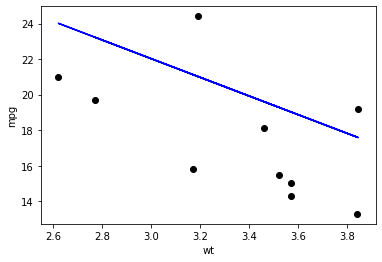

In [20]:
# Plot outputs
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue")
plt.xlabel('wt')
plt.ylabel('mpg')

In [ ]:
train_MSE2= np.mean((y_train - regr.predict(x_train))**2)
test_MSE2= np.mean((y_test - regr.predict(x_test))**2)
print("The training MSE is %2f, the testing MSE is %2f" %(train_MSE2, test_MSE2))

# or with sklearn.metrics
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, regr.predict(x_train)))
print(mean_squared_error(y_test, regr.predict(x_test)))
regr.predict(x_train)**2

Comment on training MSE vs testing MSE.  

## Part 3: Multiple linear regression with automobile data

> **EXERCISE:** With either sklearn or statsmodels, fit the training data using multiple linear regression with two predictors.  Use the model to make mpg predictions on testing set.  Print out the mean squared error for the training set and the testing set and compare.  

>How do these training and testing mean squared errors compare to those from the simple linear regression?

>Repeat the training and testing with three predictors and calculate the mean squared errors.  How do these compare to the errors from the one and two predictor models?

In [ ]:
x_train2 = train_data[['wt', 'hp']]
x_test2 = test_data[['wt', 'hp']]

#create linear regression object with sklearn
regr2 = linear_model.LinearRegression()

#train the model 
regr2.fit(x_train2, y_train)

#make predictions using the testing set
y_pred2 = regr2.predict(x_test2)

#coefficients
print('Coefficients: \n', regr.coef_[0], regr.intercept_)

train_MSE2= np.mean((y_train - regr2.predict(x_train2))**2)
test_MSE2= np.mean((y_test - regr2.predict(x_test2))**2)
print("The training MSE is %2f, the testing MSE is %2f" %(train_MSE2, test_MSE2))

print(mean_squared_error(y_train, regr2.predict(x_train2)))
print(mean_squared_error(y_test, regr2.predict(x_test2)))

##or using statsmodels
#Y = y_train
#X = x_train
#X = sm.add_constant(X)
#model = sm.OLS(Y,X)
#results = model.fit()
#print('Parameters: ', results.params)
#print('R2: ', results.rsquared)

## Part 4: Interpreting results
Tell a story with your results.  